In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()
%matplotlib inline

In [4]:
df = pd.read_csv('../data/engineered.csv', index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2577 entries, 0 to 2576
Data columns (total 86 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   PID                  2577 non-null   int64  
 1   GrLivArea            2577 non-null   int64  
 2   SalePrice            2577 non-null   int64  
 3   MSSubClass           2577 non-null   int64  
 4   MSZoning             2577 non-null   object 
 5   LotFrontage          2577 non-null   float64
 6   LotArea              2577 non-null   int64  
 7   Street               2577 non-null   int64  
 8   Alley                2577 non-null   int64  
 9   LotShape             2577 non-null   int64  
 10  LandContour          2577 non-null   object 
 11  Utilities            2577 non-null   int64  
 12  LotConfig            2577 non-null   object 
 13  LandSlope            2577 non-null   int64  
 14  Neighborhood         2577 non-null   object 
 15  Condition1           2577 non-null   o

In [5]:
df.head()

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,IsPUD,NumFloors,BsmtAllBaths,AbvGrdBaths,Collapse_MSSubClass
0,909176150,856,126000,30,RL,66.0,7890,2,0,4,...,0,March,2010,WD,Normal,False,1.0,1.0,1.00,Traditional
1,905476230,1049,139500,120,RL,42.0,4235,2,0,4,...,0,February,2009,WD,Normal,True,1.0,1.0,2.00,Traditional
2,911128020,1001,124900,30,C (all),60.0,6060,2,0,4,...,0,November,2007,WD,Normal,False,1.0,0.0,1.00,Traditional
3,535377150,1039,114000,70,RL,80.0,8146,2,0,4,...,0,May,2009,WD,Normal,False,2.0,0.0,1.00,Traditional
4,534177230,1665,227000,60,RL,70.0,8400,2,0,4,...,0,November,2009,WD,Normal,False,2.0,1.0,2.25,Traditional


In [62]:
corr = df.drop(['PID','SalePrice','MSSubClass'],axis=1).corr()
corr

,GrLivArea,LotFrontage,LotArea,Street,Alley,LotShape,Utilities,LandSlope,OverallQual,OverallCond,...,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,YrSold,IsPUD,NumFloors,BsmtAllBaths,AbvGrdBaths
GrLivArea,1.000000,0.308710,0.252293,0.057629,0.007078,-0.199137,0.019771,-0.034457,0.556367,-0.106704,...,0.009347,0.100441,0.059089,0.074437,-0.003507,-0.005025,-0.129956,0.435982,0.036412,0.700676
LotFrontage,0.308710,1.000000,0.344998,-0.062465,-0.178908,-0.163112,-0.030174,-0.070194,0.160974,-0.047395,...,0.033126,0.077282,0.084412,0.074772,0.017116,-0.002154,-0.497392,-0.068119,0.094836,0.147053
LotArea,0.252293,0.344998,1.000000,-0.154644,-0.094668,-0.279381,-0.056378,-0.426082,0.075459,-0.032228,...,0.017983,0.054394,0.052911,0.046899,0.040547,-0.015960,-0.273341,-0.028970,0.120859,0.117989
Street,0.057629,-0.062465,-0.154644,1.000000,0.015488,-0.000136,0.222389,0.095359,0.070651,0.028837,...,0.006202,-0.011123,0.003422,0.003386,-0.009659,0.001890,0.022868,0.001605,-0.018223,0.053279
Alley,0.007078,-0.178908,-0.094668,0.015488,1.000000,0.069062,0.006915,0.026591,-0.008697,0.044138,...,-0.024655,-0.004226,-0.013604,-0.013462,-0.003165,-0.002439,0.128560,0.084572,-0.074014,0.008213
LotShape,-0.199137,-0.163112,-0.279381,-0.000136,0.069062,1.000000,0.004823,0.122010,-0.244909,0.090633,...,-0.015758,-0.055739,0.003888,0.003575,-0.037201,0.036946,0.047112,-0.013832,-0.078660,-0.207694
Utilities,0.019771,-0.030174,-0.056378,0.222389,0.006915,0.004823,1.000000,-0.005483,0.041767,0.065023,...,0.002769,0.007935,0.001528,0.001512,-0.018222,-0.014024,0.010211,0.027231,0.024503,0.031010
LandSlope,-0.034457,-0.070194,-0.426082,0.095359,0.026591,0.122010,-0.005483,1.000000,0.018051,0.009453,...,-0.009173,-0.048819,0.004436,-0.023348,-0.000612,-0.014851,0.018223,0.046515,-0.115704,0.052487
OverallQual,0.556367,0.160974,0.075459,0.070651,-0.008697,-0.244909,0.041767,0.018051,1.000000,-0.095921,...,0.014468,0.050621,-0.002385,0.030825,-0.025721,0.006713,0.150429,0.106638,0.169738,0.533221
OverallCond,-0.106704,-0.047395,-0.032228,0.028837,0.044138,0.090633,0.065023,0.009453,-0.095921,1.000000,...,0.041914,0.050204,-0.021193,-0.023308,0.046025,0.017776,-0.134498,0.013018,-0.048917,-0.218673


In [98]:
corr_dict = {}
threshold = .7
corcol = corr.columns


corr_dict['threshold'] = threshold

for i in corcol:
    x = corr[corr[i]>threshold][i].sort_values(ascending=False).to_dict()
    if len(x.values()) > 1: corr_dict[i] = x
corr_dict

{'threshold': 0.7,
 'GrLivArea': {'GrLivArea': 1.0,
  'TotRmsAbvGrd': 0.8088280349075693,
  'AbvGrdBaths': 0.7006756940558729},
 'OverallQual': {'OverallQual': 1.0, 'ExterQual': 0.7122055458499383},
 'YearBuilt': {'YearBuilt': 1.0, 'GarageYrBlt': 0.8506315990165195},
 'ExterQual': {'ExterQual': 1.0, 'OverallQual': 0.7122055458499383},
 'BsmtFinType1': {'BsmtFinType1': 1.0, 'BsmtFinSF1': 0.7163534479992913},
 'BsmtFinSF1': {'BsmtFinSF1': 1.0, 'BsmtFinType1': 0.7163534479992913},
 'BsmtFinType2': {'BsmtFinType2': 1.0, 'BsmtFinSF2': 0.8020958481010732},
 'BsmtFinSF2': {'BsmtFinSF2': 1.0, 'BsmtFinType2': 0.8020958481010732},
 'TotalBsmtSF': {'TotalBsmtSF': 1.0, '1stFlrSF': 0.7810485702943762},
 '1stFlrSF': {'1stFlrSF': 1.0, 'TotalBsmtSF': 0.7810485702943762},
 '2ndFlrSF': {'2ndFlrSF': 1.0, 'NumFloors': 0.7862897444810991},
 'BsmtFullBath': {'BsmtFullBath': 1.0, 'BsmtAllBaths': 0.9930865397103347},
 'FullBath': {'FullBath': 1.0, 'AbvGrdBaths': 0.9772134774386456},
 'TotRmsAbvGrd': {'TotRmsA

In [129]:
corr_dict = {}
y = {}
x = {}
threshold = np.arange(.5,.9,.1)
corcol = corr.columns


for j in threshold:
    corr_dict[j] = 'Threshold'
    y = {}
    for i in corcol:
        x = {}
        x = corr[corr[i]>j][i].sort_values(ascending=False).to_dict()
        if len(x.values()) > 1: y[i] = x

    corr_dict[j] = y

corr_dict

{0.5: {'GrLivArea': {'GrLivArea': 1.0,
   'TotRmsAbvGrd': 0.8088280349075693,
   'AbvGrdBaths': 0.7006756940558729,
   '2ndFlrSF': 0.6621921906035321,
   'FullBath': 0.6428896861960567,
   'OverallQual': 0.5563671442884495,
   'BedroomAbvGr': 0.5430380655767262,
   '1stFlrSF': 0.5299344721722437},
  'OverallQual': {'OverallQual': 1.0,
   'ExterQual': 0.7122055458499383,
   'KitchenQual': 0.6519567100248344,
   'BsmtQual': 0.6218227811430335,
   'GarageCars': 0.5794464796096597,
   'YearBuilt': 0.5741043925167251,
   'GarageYrBlt': 0.5615721305132125,
   'GrLivArea': 0.5563671442884495,
   'YearRemodAdd': 0.5461682521499894,
   'GarageArea': 0.5364515168481252,
   'AbvGrdBaths': 0.5332211471850012,
   'TotalBsmtSF': 0.5246421106031318,
   'FullBath': 0.5051760798836816},
  'YearBuilt': {'YearBuilt': 1.0,
   'GarageYrBlt': 0.8506315990165195,
   'BsmtQual': 0.61128689303814,
   'ExterQual': 0.5777762570395355,
   'OverallQual': 0.5741043925167251,
   'YearRemodAdd': 0.571732626396894,
  

In [131]:
for i in corr_dict.keys():
    print('threshold of :' + str(i))
    print('drops ' + str(len(corr_dict[i].keys()))+ ' vars (inc repeats)')

threshold of :0.5
drops 33 vars (inc repeats)
threshold of :0.6
drops 31 vars (inc repeats)
threshold of :0.7
drops 26 vars (inc repeats)
threshold of :0.7999999999999999
drops 16 vars (inc repeats)


In [132]:
mask = np.abs(corr.values) > .7
mask

array([[ True, False, False, ..., False, False,  True],
       [False,  True, False, ..., False, False, False],
       [False, False,  True, ..., False, False, False],
       ...,
       [False, False, False, ...,  True, False, False],
       [False, False, False, ..., False,  True, False],
       [ True, False, False, ..., False, False,  True]])

<AxesSubplot:>

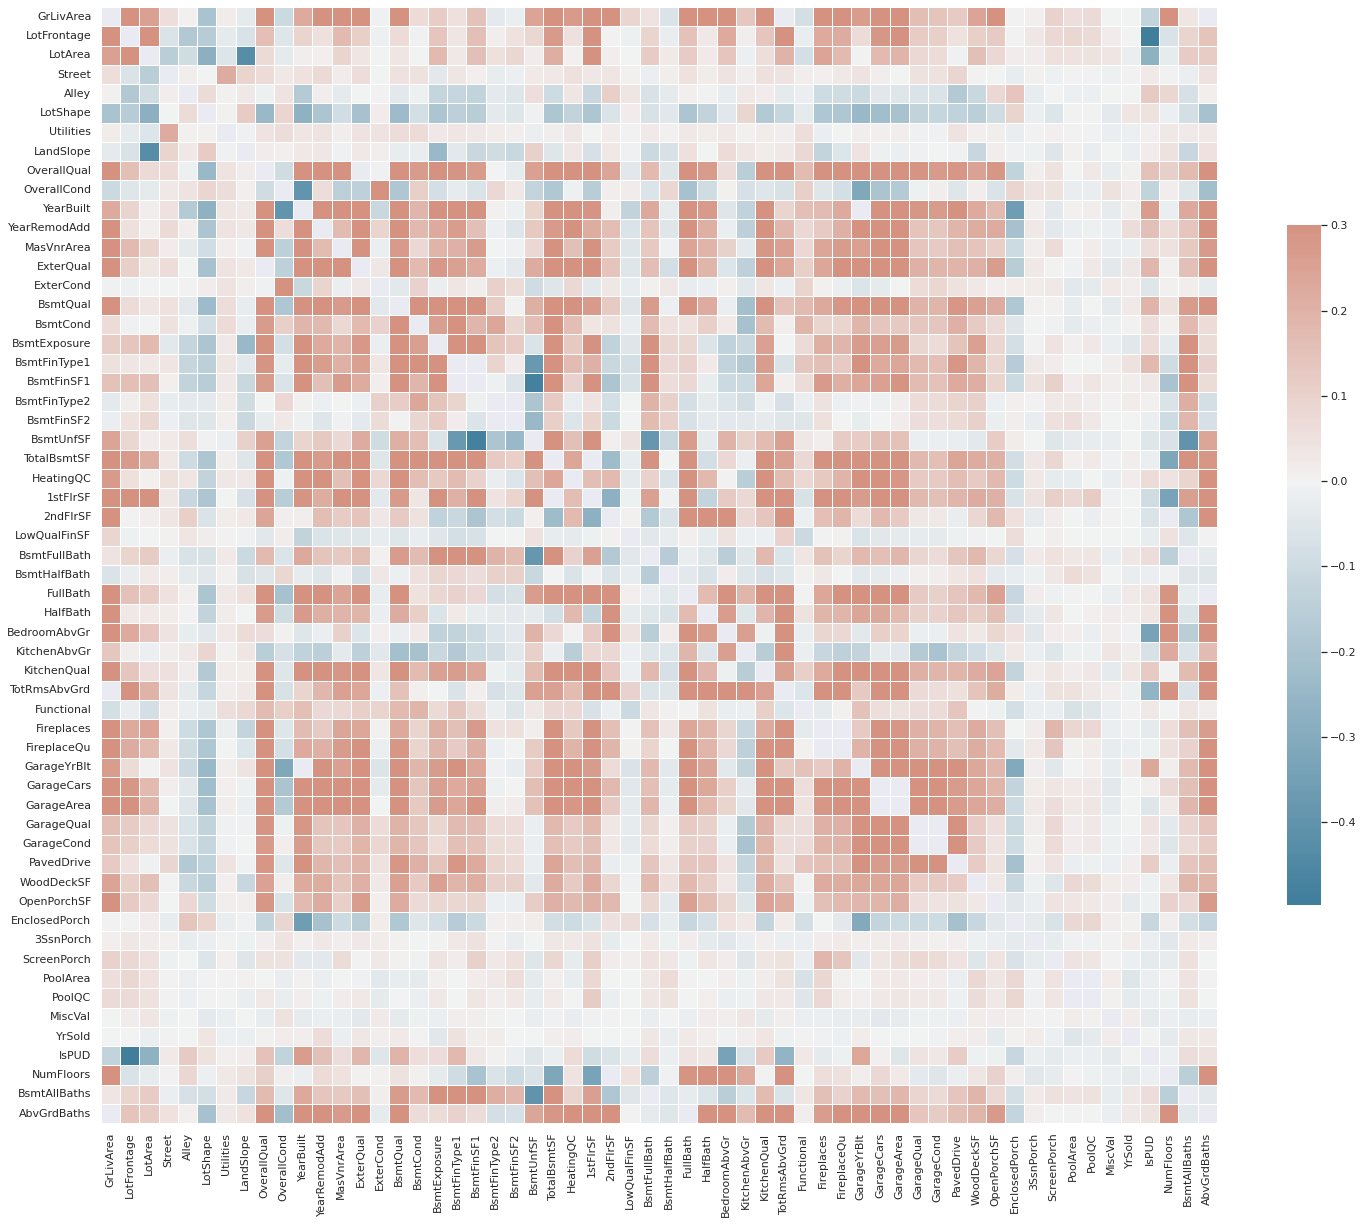

In [133]:
f, ax = plt.subplots(figsize=(25, 25))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask,cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})